In [12]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().parent))
(Path.cwd().parent)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PosixPath('/home/ubuntu/varios/skforecast')

In [13]:
import pandas as pd
import numpy as np
from skforecast.utils import multivariate_time_series_corr
from skforecast.plot import plot_multivariate_time_series_corr

In [14]:
# Data download
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/'
    'Estadistica-machine-learning-python/master/data/air_quality_valencia.csv'
)
data = pd.read_csv(url, sep=',')

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y-%m-%d %H:%M:%S')
data = data.set_index('datetime')
data = data.drop(columns=['veloc.', 'direc.'])
data = data.asfreq('H')
data = data.sort_index()
data = data.loc['2021-01-01 00:00:00': '2021-12-31 11:00:00']

# Aggregating in 1D intervals
# ==============================================================================
data = data.resample(rule='D', closed='left', label ='left').mean()
data.head()

# Missing imputation with rolling mean
# ==============================================================================
data['pm2.5'] = data['pm2.5'].fillna(data['pm2.5'].rolling(window='25d', center=True, axis=0).mean())
data['pm10']  = data['pm10'].fillna(data['pm10'].rolling(window='25d', center=True, axis=0).mean())
data['co']    = data['co'].fillna(data['co'].rolling(window='10d', center=True, axis=0).mean())
data['o3']    = data['o3'].fillna(data['o3'].rolling(window='5d', center=True, axis=0).mean())
data['so2']   = data['so2'].fillna(data['so2'].rolling(window='10d', center=True, axis=0).mean())

data= pd.concat([data,data,data,data,data])

In [15]:
corr = multivariate_time_series_corr(
    time_series = data['pm2.5'],
    other       = data,
    lags        = 5
)
corr

,pm2.5,co,no,no2,pm10,nox,o3,so2
lag,,,,,,,,
0,1.000000,-0.050437,0.358713,0.427705,0.835836,0.435800,-0.260211,-0.123025
1,0.774216,-0.099094,0.228872,0.386544,0.696288,0.350768,-0.203467,-0.131022
2,0.541201,-0.076636,0.171215,0.283146,0.548634,0.259532,-0.181258,-0.126705
3,0.385159,-0.049723,0.063409,0.121179,0.429336,0.108291,-0.105378,-0.123055
4,0.305035,-0.036743,0.009427,0.012708,0.357420,0.014990,-0.043324,-0.121805


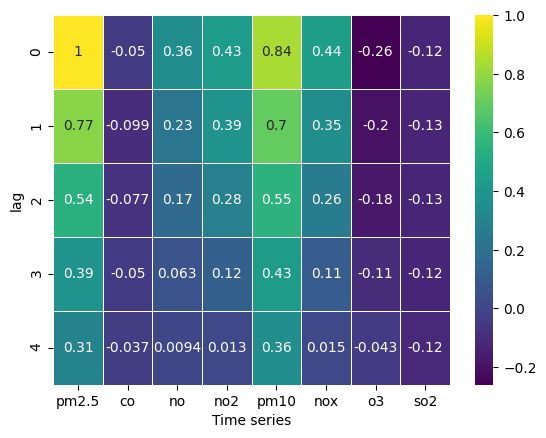

In [16]:
plot_multivariate_time_series_corr(corr)